### Analyzing tweakreg shifts

Karl Gordon

12 Jun 2022

In [1]:
from tweakwcs import JWSTgWCS
from jwst import datamodels
import numpy as np
import glob

In [14]:
RAD2ARCSEC = 3600.0 * np.rad2deg(1.0)

filter = "F770W"
twfiles = np.sort(glob.glob(f"./{filter}/stage3/*wcs_tweakreg.fits"))

shifts = np.zeros((2, len(twfiles)))
for k, cfile in enumerate(twfiles):
    # extract x,y shifts from the aligned image:
    aligned_model = datamodels.open(cfile)
    matrix = aligned_model.meta.wcs.forward_transform['tp_affine'].matrix.value
    cshift = RAD2ARCSEC * aligned_model.meta.wcs.forward_transform['tp_affine'].translation.value
    
    shifts[:, k] = cshift
    print(cfile, cshift, aligned_model.meta.guidestar.gs_id)

./F770W/stage3/jw02731002001_02103_00001_mirimage_fixed_wcs_tweakreg.fits [ 0.17871361 -0.03073757] S4AZ030033
./F770W/stage3/jw02731002001_02103_00002_mirimage_fixed_wcs_tweakreg.fits [ 0.17985308 -0.03162595] S4AZ030033
./F770W/stage3/jw02731002001_02103_00003_mirimage_fixed_wcs_tweakreg.fits [ 0.18988397 -0.02938664] S4AZ030033
./F770W/stage3/jw02731002001_02103_00004_mirimage_fixed_wcs_tweakreg.fits [ 0.18717351 -0.02903121] S4AZ030033
./F770W/stage3/jw02731002001_02103_00005_mirimage_fixed_wcs_tweakreg.fits [ 0.19243227 -0.03263188] S4AZ030033
./F770W/stage3/jw02731002001_02103_00006_mirimage_fixed_wcs_tweakreg.fits [ 0.18613561 -0.03670256] S4AZ030033
./F770W/stage3/jw02731002001_02103_00007_mirimage_fixed_wcs_tweakreg.fits [ 0.17954726 -0.03455622] S4AZ030033
./F770W/stage3/jw02731002001_02103_00008_mirimage_fixed_wcs_tweakreg.fits [ 0.18252585 -0.03425477] S4AZ030033
./F770W/stage3/jw02731002002_02103_00001_mirimage_fixed_wcs_tweakreg.fits [ 0.18779706 -0.03353294] S4AZ029765
.

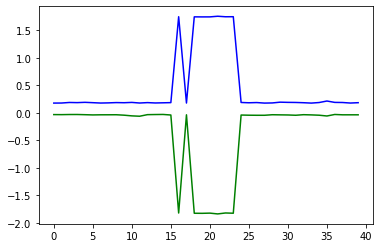

In [3]:
import matplotlib.pyplot as plt

plt.plot(range(len(twfiles)), shifts[0, :], "b-")
plt.plot(range(len(twfiles)), shifts[1, :], "g-")

In [4]:
from astropy.stats import sigma_clip

# determine the aveage values for each tile
for k in range(5):
    k1 = k*8
    k2 = k1 + 8
    avex = np.average(sigma_clip(shifts[0, k1:k2]))
    avey = np.average(sigma_clip(shifts[1, k1:k2]))
    print(k, avex, avey)

0 0.18453314576264052 -0.032365850976261525
1 0.18538584899573868 -0.03966800205771968
2 1.7505750809691034 -1.826683328950826
3 0.1874700534625803 -0.03952807029062376
4 0.18938011964430956 -0.037490623824123034


In [5]:
aligned_model.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.11.1
├─history (dict)
│ └─extensions (list) ...
├─_fits_hash (str): 1258e9b584719b496859dd5389fc717b8783b12057a761dfb77ed433ed8be2be
├─area (NDArrayType): shape=(1024, 1032), dtype=float32
├─data (NDArrayType): shape=(1024, 1032), dtype=float32
├─dq (NDArrayType): shape=(1024, 1032), dtype=uint32
├─err (NDArrayType): shape=(1024, 1032), dtype=float32
├─meta (dict)
│ ├─aperture (dict) ...
│ ├─asn (dict) ...
│ ├─background (dict)
│ ├─bunit_data (str): MJy/sr
│ ├─bunit_err (str): MJy/sr
│ └─35 not shown
├─var_flat (NDArrayType): shape=(1024, 1032), dtype=float32
├─var_poisson (NDArrayType): shape=(1024, 1032), dtype=float32
└─var_rnoise (NDArrayType): shape=(1024, 1032), dtype=float32
Some nodes not shown.


In [12]:
# aligned_model.meta.instance

{'aperture': {'name': 'MIRIM_FULL',
  'position_angle': 116.8508152412792,
  'pps_name': 'MIRIM_ILLUM'},
 'asn': {'pool_name': 'none', 'table_name': 'miri_F770W_stage3_asn.json'},
 'background': {},
 'bunit_data': 'MJy/sr',
 'bunit_err': 'MJy/sr',
 'cal_step': {'assign_wcs': 'COMPLETE',
  'dark_sub': 'COMPLETE',
  'dq_init': 'COMPLETE',
  'firstframe': 'COMPLETE',
  'flat_field': 'COMPLETE',
  'gain_scale': 'SKIPPED',
  'group_scale': 'SKIPPED',
  'ipc': 'COMPLETE',
  'jump': 'COMPLETE',
  'lastframe': 'COMPLETE',
  'linearity': 'COMPLETE',
  'photom': 'COMPLETE',
  'ramp_fit': 'COMPLETE',
  'refpix': 'COMPLETE',
  'reset': 'COMPLETE',
  'rscd': 'COMPLETE',
  'saturation': 'COMPLETE',
  'tweakreg': 'COMPLETE'},
 'calibration_software_revision': 'f45011d4',
 'calibration_software_version': '1.5.1a1.dev6+gf45011d4',
 'coordinates': {'reference_frame': 'ICRS'},
 'data_processing_software_version': '2022_1c',
 'date': '2022-06-14T16:10:41.102',
 'dither': {'pattern_size': 'LARGE',
  'patte